<a href="https://colab.research.google.com/github/anitashar/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/ANITA_SHARMA_Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#  sales for the past week
sales=[3505, 2400, 3027, 2798, 3700, 3250, 2689]


In [15]:
# mean of sales
total = sum(sales)
mean_sales= total/len(sales)
print('mean of sales from past week :', mean_sales)



mean of sales from past week : 3052.714285714286


In [17]:
# Variance which is a distance of each point from mean
def subtract_mean(number):
    return number-mean_sales

    # lambda function
lambda x: x-mean_sales


<function __main__.<lambda>>

In [18]:
# distances from mean of each point
distances = list(map(subtract_mean, sales))
distances

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [20]:
# square all the distances
squared_distances = list(map(lambda x: x**2, distances))
squared_distances

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
# how long is our list?
# for a sample 
length_samp = len(squared_distances)-1

# for the whole population
length_pop = len(squared_distances)

In [26]:
# variance for a sample
variance_samp = sum(squared_distances)/length_samp
print('the variance of the sample :''{:.2f}'.format(variance_samp,3))


# variance for pop
variance_pop = sum(squared_distances)/length_pop
print('the variance of the population :''{:.2f}'.format(variance_pop,3))


the variance of the sample :214387.90
the variance of the population :183761.06


In [31]:
import math


#standard deviation (square root of the variance)
# std of a sample
print('std of the sample:''{:.2f}'.format(math.sqrt(variance_samp)))

# STD for the population
print('std of the population:''{:.2f}'.format(math.sqrt(variance_pop)))

std of the sample:463.02
std of the population:428.67


In [0]:
# checking the work by using numpy & pandas
import pandas as pd
import numpy as np

In [34]:
# mean,std,var using numpy--numpy uses population by default

print(np.mean(sales))
print('{:.2f}'.format(np.var(sales)))
print('{:.2f}'.format(np.std(sales)))

3052.714285714286
183761.06
428.67


In [35]:
# create dataframe first to apply function
df = pd.DataFrame({'sales': sales})
print('mean:', df['sales'].mean())

mean: 3052.714285714286


In [36]:
# for a population ---- have to use df=0 to get population parameter
print('var:', '{:.2f}'.format(df['sales'].var(ddof=0)))
print('std:', '{:.2f}'.format(df['sales'].std(ddof=0)))

var: 183761.06
std: 428.67


In [38]:
# for a sample --- have to use df=1 for sample statistics
print('var:', '{:.2f}'.format(df['sales'].var(ddof=1)))
print('std:', '{:.2f}'.format(df['sales'].std(ddof=1)))

var: 214387.90
std: 463.02


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# covariance
customers= [127, 80, 105, 92, 120, 115, 93]



In [42]:
# finding covariance using numpy
np.cov(sales,customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [45]:
(np.cov(sales,customers)[0][1])

7604.357142857142

In [46]:
# current df
df


,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [47]:
# adding one more column to df using pandas (we always need dataframe to work with pandas)
df['customers'] =pd.Series(customers)
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [48]:
# individual covariance
df.cov().values[0][1]

7604.357142857142

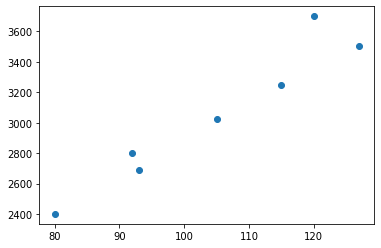

In [49]:
import matplotlib.pyplot as plt
plt.scatter(customers, sales);

# as the number of customer  increases sale will increase too--positive covariance

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [50]:
#calculate the STD of both lists using pandas
std_sales = df['sales'].std(ddof=1)
std_cust = df['customers'].std(ddof=1)
print(std_sales, '\n', std_cust)

463.0204150595357 
 17.057326313123664


In [51]:
#Calcuate covariance using pandas
cov_sc = df['sales'].cov(df['customers'])
print('{:.2f}'.format(cov_sc))

7604.36


In [52]:
#calucate the demonator
demon = std_sales * std_cust
demon

7897.890309308459

In [53]:
#caulcate the correlation
corr_sc = cov_sc/demon
print('{:.2f}'.format(corr_sc))


0.96


In [54]:
#using pandas
print('correlation coefficient: ', df['sales'].corr(df['customers']))

correlation coefficient:  0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [61]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df1= pd.read_csv(url)
print(df.shape)
df1.sample(3)

(7, 2)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
253,254,1.0,1.0,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1.0,3.0,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY",1
128,129,1.0,0.0,"Gee, Mr. Arthur H",male,47.0,0.0,0.0,111320,38.5000,E63,S,NaN,275.0,"St Anne's-on-Sea, Lancashire",1
478,479,2.0,1.0,"Laroche, Miss. Louise",female,1.0,1.0,2.0,SC/Paris 2123,41.5792,NaN,C,14,NaN,Paris / Haiti,0


In [62]:
df1.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [64]:
df1.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [66]:
df1.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [67]:
df1.describe(exclude='number')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1310,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,917,39,64


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

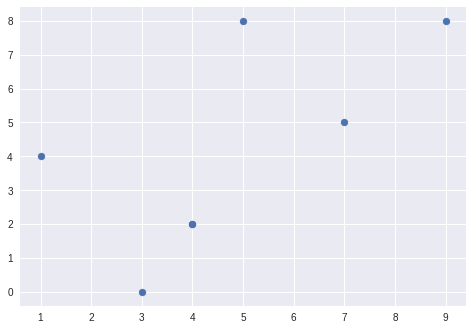

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()